📘 Titanic Data Analysis with Probability
Part A – Data Exploration (Pandas & NumPy)

1️⃣ Load the Dataset

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display first 10 rows
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2️⃣ Column Names & Data Types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3️⃣ Statistical Summary

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


🔧 Handling Missing Values
Check Missing Values

In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fill Missing Age with Mean (NumPy)

In [6]:
mean_age = np.mean(df['Age'])
df['Age'].fillna(mean_age, inplace=True)


C:\Users\S A COMPUTER\AppData\Local\Temp\ipykernel_6392\3708067206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


Fill Missing Embarked with Mode

In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\S A COMPUTER\AppData\Local\Temp\ipykernel_6392\411043493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


📊 Basic Questions

In [8]:
total_passengers = df.shape[0]
avg_age = df['Age'].mean()
avg_fare = df['Fare'].mean()
gender_counts = df['Sex'].value_counts()

total_passengers, avg_age, avg_fare, gender_counts


(891,
 29.69911764705882,
 32.204207968574636,
 Sex
 male      577
 female    314
 Name: count, dtype: int64)

Part B – Data Analysis (Pandas)

🚢 Survival Analysis

In [9]:
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

Survival Percentage

In [10]:
survival_rate = df['Survived'].mean() * 100
survival_rate


38.38383838383838

🎟 Survival by Class

In [11]:
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
class_survival


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

✅ 1st Class had the highest survival rate

👶 Survival by Age Group

In [12]:
bins = [0, 12, 19, 40, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_survival = df.groupby('AgeGroup')['Survived'].mean() * 100
age_survival


C:\Users\S A COMPUTER\AppData\Local\Temp\ipykernel_6392\2572056594.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].mean() * 100


AgeGroup
Child     57.971014
Teen      41.052632
Adult     36.048527
Senior    36.666667
Name: Survived, dtype: float64

Part C – Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


📊 Matplotlib Visualizations

Bar Chart – Survivors

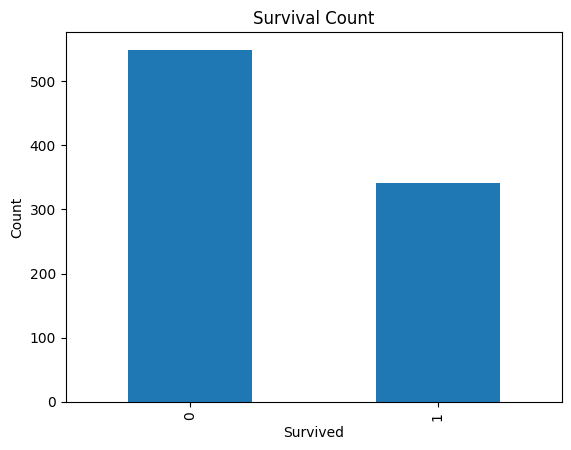

In [16]:
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


Histogram – Age Distribution

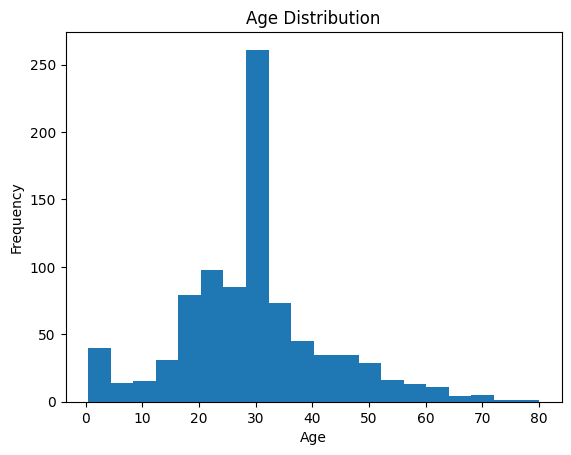

In [17]:
plt.hist(df['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Pie Chart – Gender Distribution

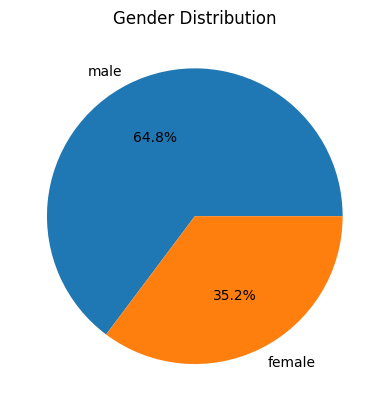

In [18]:
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


🎨 Seaborn Visualizations

Countplot – Survival by Gender

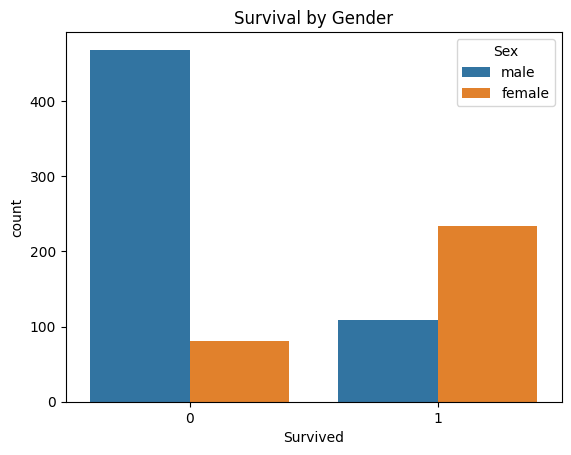

In [19]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()


Boxplot – Fare by Class

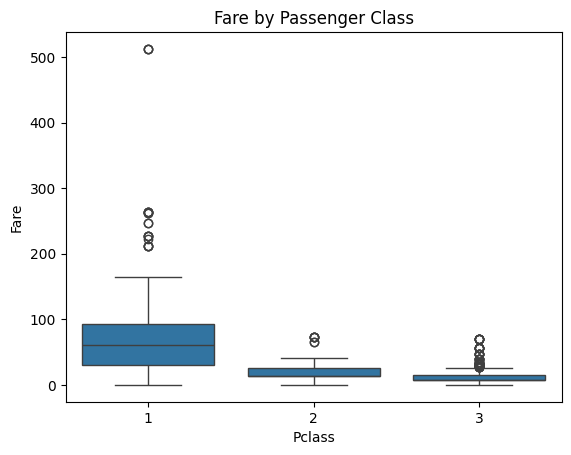

In [20]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.show()


Violinplot – Age by Survival

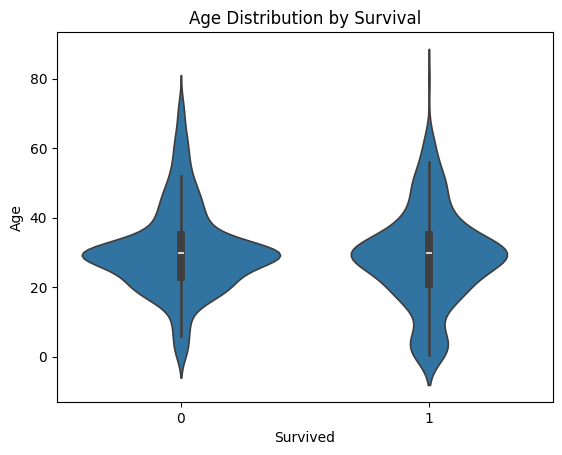

In [21]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


Heatmap – Correlation

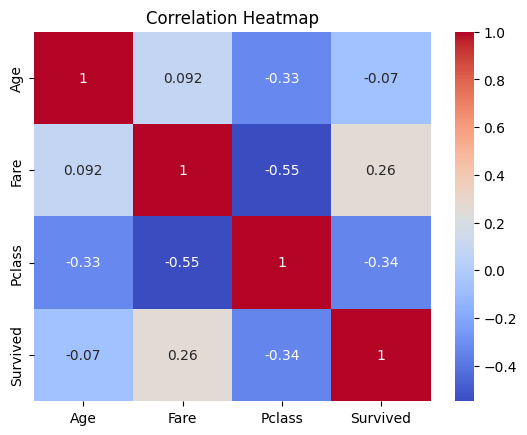

In [22]:
corr = df[['Age', 'Fare', 'Pclass', 'Survived']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Part D – Probability Concepts

1️⃣ Empirical Probability (From Data)

In [23]:
# Overall survival probability
p_survived = df['Survived'].mean()

# Survival by gender
female_survival = df[df['Sex']=='female']['Survived'].mean()
male_survival = df[df['Sex']=='male']['Survived'].mean()

# Survival by class
class_prob = df.groupby('Pclass')['Survived'].mean()

p_survived, female_survival, male_survival, class_prob


(0.3838383838383838,
 0.7420382165605095,
 0.18890814558058924,
 Pclass
 1    0.629630
 2    0.472826
 3    0.242363
 Name: Survived, dtype: float64)

2️⃣ Theoretical Probability (Assumptions)

| Scenario            | Theoretical Probability |
| ------------------- | ----------------------- |
| Survived            | 0.5                     |
| Each Class Survival | 1/3                     |
| Gender Survival     | Equal                   |
